In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier  
# from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Datasets/Arrhythmia.csv')
pd.set_option('display.max_column',None)
df.shape

(100689, 34)

In [17]:
df_cleaned

,Unnamed: 0,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,...,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval
0,0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,...,0.996287,0.038310,0.025784,0.025930,0.025271,0.025930,2,18,22,2
1,1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,...,0.084069,0.014264,0.045458,0.032573,-0.104503,-0.042009,26,27,62,9
2,2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,...,0.091258,0.021311,0.008246,0.009528,0.008230,0.009528,3,8,12,1
3,3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,...,0.136602,-0.000665,-0.009725,-0.010203,-0.010203,-0.020536,6,9,16,1
4,4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,...,0.649990,0.024559,0.016925,0.016053,-0.099918,0.016053,16,5,31,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,...,0.949106,-0.050373,0.434459,-0.044400,-0.044400,-0.069234,5,6,20,9
100685,100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,...,0.943879,-0.058160,0.359751,-0.023172,-0.023172,-0.069530,7,5,20,8
100686,100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,...,1.022350,-0.073165,0.359805,-0.037813,-0.037813,-0.089396,9,7,24,8
100687,100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,...,0.458306,-0.065287,0.418958,-0.049864,-0.049864,-0.065487,3,1,12,8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Sameer\AppData\Local\Temp\ipykernel_18504\812327179.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(),annot = True)


<Axes: >

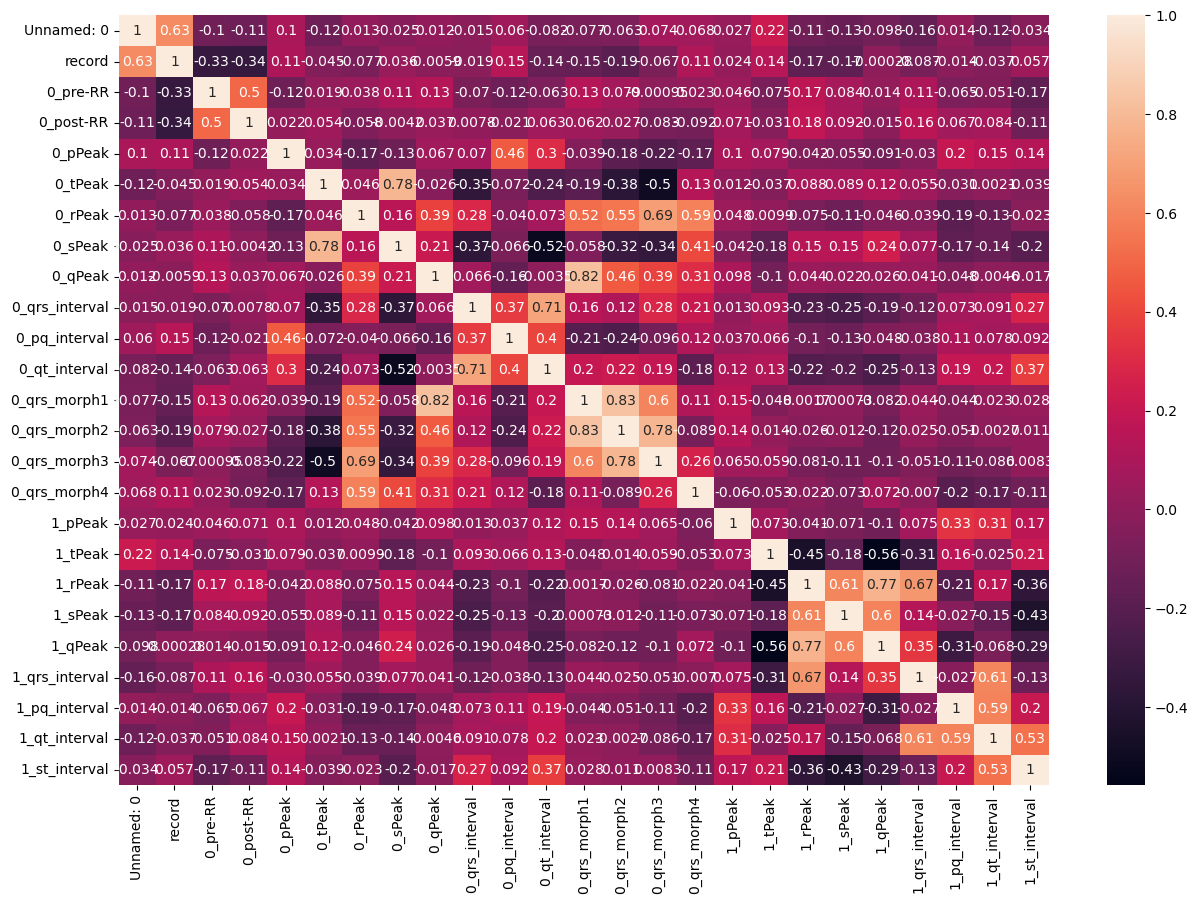

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cleaned.corr(),annot = True)

In [10]:
def corr_rem(dataset, threshold):
    cor_col = set()
    corr_matrix = df.corr(numeric_only = True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])) > threshold:
                colname = corr_matrix.columns[i]
                cor_col.add(colname)
    return cor_col
    

In [ ]:
list = []

In [18]:
list = corr_rem(df,0.85)
list

{'0_qrs_morph0',
 '0_st_interval',
 '1_post-RR',
 '1_pre-RR',
 '1_qrs_morph0',
 '1_qrs_morph1',
 '1_qrs_morph2',
 '1_qrs_morph3',
 '1_qrs_morph4'}

In [20]:
df.drop(columns = ['0_qrs_morph0','0_st_interval','1_post-RR','1_pre-RR','1_qrs_morph0','1_qrs_morph1','1_qrs_morph2','1_qrs_morph3','1_qrs_morph4'],inplace = True)

In [35]:

N_index = df[df['type'] == 'N'].index
rows_to_drop = np.random.choice(N_index, 10000, replace=True)

# # Drop the selected rows
# df_dropped = df.drop(rows_to_drop)

# # Display the resulting DataFrame
# print(df_dropped)
# rows_to_drop
# df_dropped
# rows_to_drop = pd.DataFrame(rows_to_drop)
# rows_to_drop.unique()
# n_rows
df.drop(rows_to_drop,inplace  =True)

<IPython.core.display.Javascript object>

In [36]:
df.to_csv('Arrithmia_cleanes.csv')

In [37]:
N_index = df[df['type'] == 'N'].index
rows_to_drop = np.random.choice(N_index, 20000, replace=True)
df.drop(rows_to_drop,inplace  =True)

<IPython.core.display.Javascript object>

In [38]:
df['type'].value_counts()

VEB     7009
SVEB    2779
N       2338
F        803
Name: type, dtype: int64

<IPython.core.display.Javascript object>

<Axes: xlabel='type', ylabel='count'>

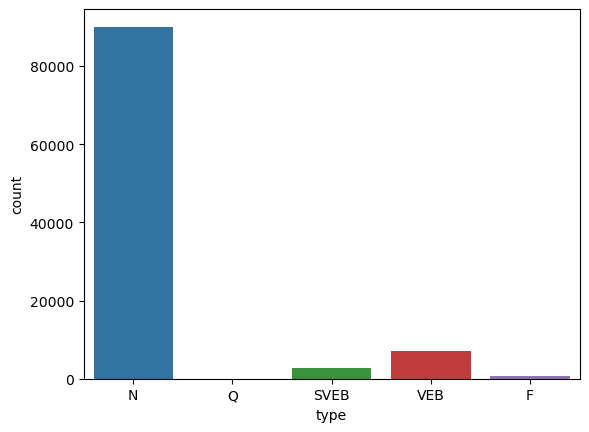

In [16]:
# df.isnull().sum()
sns.countplot(data= dfcleaned ,x = 'type')

In [46]:
df['type'].value_countscount()


N       37145
VEB      7009
SVEB     2779
F         803
Q          15
Name: type, dtype: int64

In [65]:
df

,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,0_st_interval,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4,1_pre-RR,1_post-RR,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
8,N,313,310.0,-0.061510,-0.257011,1.107787,-0.385508,-0.065044,25,5,37,7,-0.065044,-0.037199,0.532009,1.070093,0.060795,313,310.0,0.024459,0.020524,0.028755,-0.037869,-0.029834,21,31,61,9,-0.029834,-0.020603,0.004411,0.025997,0.015942
9,N,310,329.0,-0.063513,-0.319736,1.087343,-0.425738,-0.074461,22,4,32,6,-0.074461,0.074970,0.743722,0.914596,0.026159,310,329.0,0.019993,0.006456,0.018915,-0.081985,0.018915,15,2,26,9,0.018915,0.010747,0.000927,-0.018538,-0.060157
10,N,329,330.0,-0.063022,-0.311176,0.997074,-0.386402,-0.077501,22,5,32,5,-0.077501,0.060551,0.652223,0.878837,0.073676,329,330.0,-0.003405,0.060538,-0.011816,-0.111341,-0.011816,9,4,23,10,-0.011816,-0.017227,-0.035757,-0.066283,-0.099197
20,N,305,302.0,-0.067763,-0.301193,0.975158,-0.302590,-0.087806,23,7,32,2,-0.087806,0.129311,0.925098,0.675697,-0.149968,305,302.0,-0.009473,0.006773,0.031337,-0.086056,-0.031005,30,9,48,9,-0.031005,-0.012284,0.020725,0.030527,0.008414
25,N,319,309.0,-0.093006,0.830369,0.819290,0.819290,-0.097541,10,3,14,1,-0.097541,-0.075992,0.033108,0.279070,0.603381,319,309.0,-0.009701,0.046998,-0.010376,-0.120083,-0.010376,9,1,21,11,-0.010376,-0.012931,-0.029171,-0.064724,-0.105083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100663,N,248,239.0,-0.102311,-0.422597,1.366724,-0.679271,-0.114134,25,4,37,8,-0.114134,0.046626,0.827115,1.336605,0.147320,248,239.0,-0.045614,0.358433,-0.049962,-0.049962,-0.061898,6,7,22,9,-0.061898,-0.061033,-0.059398,-0.057794,-0.056481
100665,N,236,241.0,0.146126,-0.403864,1.334375,-0.686578,-0.120118,31,26,65,8,-0.120118,-0.114765,0.181997,1.256510,0.505495,236,241.0,-0.045415,0.409444,-0.062868,-0.062868,-0.083115,3,7,20,10,-0.083115,-0.083115,-0.080647,-0.080647,-0.074043
100667,N,253,241.0,-0.110417,-0.397803,1.373883,-0.710776,-0.117134,24,3,35,8,-0.117134,0.019129,0.806795,1.350273,0.160657,253,241.0,-0.063957,0.404432,-0.045809,-0.045809,-0.093728,5,7,21,9,-0.093728,-0.090744,-0.083550,-0.073292,-0.060857
100679,N,235,239.0,-0.105415,1.394489,1.385766,1.385766,-0.105791,15,2,18,1,-0.105791,-0.097463,-0.013966,0.303115,0.907598,235,239.0,-0.043528,0.370599,-0.044414,-0.044414,-0.085935,10,8,27,9,-0.085935,-0.081390,-0.068728,-0.056347,-0.050527


In [47]:
df.drop('record',axis  = 1,inplace = True)

In [66]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(['type'], axis=1)
y = df["type"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [8]:
# import xgboost as XGBClassifier


In [24]:
rf_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
# xgb_model = XGBClassifier(n_estimators=100).fit(X_train, y_train)

In [25]:
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
# rf_cm = confusion_matrix(y_test, rf_preds)  
rf_acc

0.9901181845267654

In [11]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

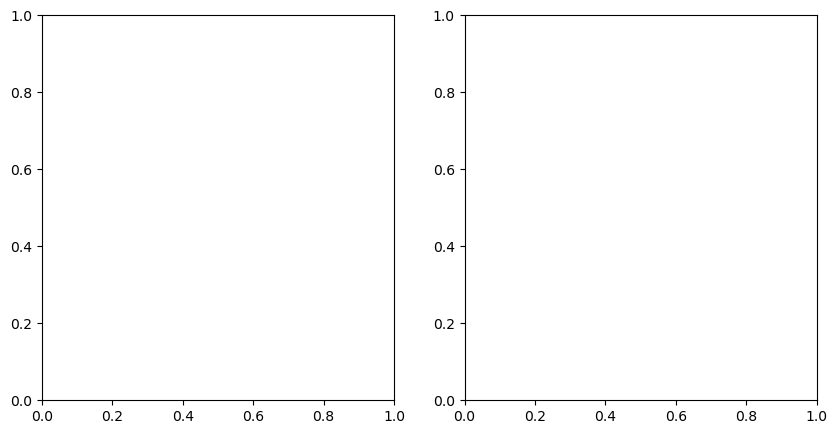

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


In [13]:
import seaborn as sns
sns.countplot(df['type'])


ValueError: could not convert string to float: 'N'

In [20]:
confusion_matrix(y_test, rf_preds) 


array([[  116,    24,     0,     0,    10],
       [    3, 18001,     0,    15,    10],
       [    0,     1,     0,     0,     0],
       [    0,   101,     0,   479,     2],
       [    6,    49,     0,     3,  1318]], dtype=int64)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


In [21]:
print("Random Forest Accuracy:", rf_acc)  


Random Forest Accuracy: 0.9888767504220876


In [23]:
def predict_type(model, X_new):
    return model.predict(X_new)

In [ ]:
df[df['type'] == 'Q']

In [32]:
X_new = [#veb data
[152,268.0,0.705165,1.202141,-1.078454,-1.759830,-1.078454,5,8,48,35,-1.078454,-1.338527,-1.541171,-1.678274,-1.749305,152,268.0,-0.283113,0.949927,-0.171920,-0.171920,-0.354663,6,10,32,16,-0.354663,-0.351908,-0.339511,-0.314310,-0.275940]] # New patient features
arr_type = predict_type(rf_model, X_new) 
print("Predicted Arrhythmia Type:", arr_type[0])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 31 features, but RandomForestClassifier is expecting 32 features as input.

In [31]:
203,268,309.0,-0.006709,-0.035049,0.094130,-0.055756,-0.006907,42,3,53,8,-0.006907,0.006499,0.031413,0.092211,0.032972,268,309.0,0.093861,0.420936,-0.598366,-0.739548,-0.598366,5,27,57,25,-0.598366,-0.648244,-0.687504,-0.716175,-0.733917

(203,
 268,
 309.0,
 -0.006709,
 -0.035049,
 0.09413,
 -0.055756,
 -0.006907,
 42,
 3,
 53,
 8,
 -0.006907,
 0.006499,
 0.031413,
 0.092211,
 0.032972,
 268,
 309.0,
 0.093861,
 0.420936,
 -0.598366,
 -0.739548,
 -0.598366,
 5,
 27,
 57,
 25,
 -0.598366,
 -0.648244,
 -0.687504,
 -0.716175,
 -0.733917)

In [28]:
df[df['0_post-RR'] == 268]

,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,0_st_interval,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4,1_pre-RR,1_post-RR,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
1896,N,277,268.0,-0.088611,-0.422829,1.981928,-1.056053,-0.116052,23,4,35,8,-0.116052,0.078581,1.391516,1.961410,0.141333,277,268.0,0.001322,0.174451,-0.063555,-0.063555,-0.112695,7,10,26,9,-0.112695,-0.111541,-0.108723,-0.097885,-0.089178
5729,N,251,268.0,-0.029316,0.414741,1.257763,-1.266677,-0.046761,40,5,141,96,-0.046761,0.412598,1.142827,0.890585,-0.536903,251,268.0,0.096716,0.565810,-0.745262,-0.941949,-0.745262,4,13,56,39,-0.745262,-0.745262,-0.829972,-0.894304,-0.932630
5738,N,249,268.0,-0.032466,0.415204,1.160411,-1.208546,-0.054691,41,5,141,95,-0.054691,0.380424,1.066482,0.823736,-0.413050,249,268.0,0.088221,0.560161,-0.729912,-0.913787,-0.729912,4,13,55,38,-0.729912,-0.729912,-0.810815,-0.871497,-0.906718
5757,N,257,268.0,-0.016139,0.427025,1.237555,-1.324908,-0.022390,41,3,140,96,-0.022390,0.377458,1.126892,0.944139,-0.407761,257,268.0,0.099666,0.601783,-0.786280,-0.982029,-0.786280,4,13,54,37,-0.786280,-0.786280,-0.871365,-0.935568,-0.973439
5822,N,251,268.0,-0.049339,0.491062,1.373655,-1.411210,-0.073555,40,5,141,96,-0.073555,0.416163,1.259474,0.954152,-0.642883,251,268.0,0.104661,0.650590,-0.850831,-1.068408,-0.850831,4,12,53,37,-0.850831,-0.850831,-0.945711,-1.016984,-1.058865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97555,VEB,147,268.0,0.716996,1.139681,-1.114805,-1.675962,-1.114805,5,9,44,30,-1.114805,-1.339684,-1.510061,-1.621499,-1.675015,147,268.0,-0.242256,0.764586,-0.293516,-0.293516,-0.348133,3,8,26,15,-0.348133,-0.348133,-0.340190,-0.340190,-0.321304
97559,VEB,152,268.0,0.705165,1.202141,-1.078454,-1.759830,-1.078454,5,8,48,35,-1.078454,-1.338527,-1.541171,-1.678274,-1.749305,152,268.0,-0.283113,0.949927,-0.171920,-0.171920,-0.354663,6,10,32,16,-0.354663,-0.351908,-0.339511,-0.314310,-0.275940
97614,VEB,147,268.0,0.800193,1.158031,-1.065997,-1.690377,-1.065997,5,9,46,32,-1.065997,-1.312302,-1.500311,-1.624231,-1.685371,147,268.0,-0.273718,0.807758,-0.296736,-0.296736,-0.366222,4,9,29,16,-0.366222,-0.366222,-0.363579,-0.350577,-0.327707
97862,VEB,157,268.0,0.440606,-0.269507,1.199551,-1.444902,0.361596,41,18,72,13,0.361596,0.384535,0.593202,1.129856,0.808564,157,268.0,-0.038842,0.275970,-0.050794,-1.166780,-0.050794,21,3,38,14,-0.050794,-0.080636,-0.191149,-0.412764,-0.759189


In [33]:
pickle.dump(rf_model, open('model_1.pkl','wb'))


<IPython.core.display.Javascript object>

In [39]:
sns.catplot(x=df['type'],kind='count')

TypeError: object of type 'NoneType' has no len()

In [36]:
df1 = df.copy()

In [44]:
df.insull().sum()

AttributeError: 'DataFrame' object has no attribute 'insull'

In [37]:
df1['type'].map({'N':1, 'Q', 'SVEB', 'VEB', 'F'})

array(['N', 'Q', 'SVEB', 'VEB', 'F'], dtype=object)

In [ ]:
#veb data
# [152,268.0,0.705165,1.202141,-1.078454,-1.759830,-1.078454,5,8,48,35,-1.078454,-1.338527,-1.541171,-1.678274,-1.749305,152,268.0,-0.283113,0.949927,-0.171920,-0.171920,-0.354663,6,10,32,16,-0.354663,-0.351908,-0.339511,-0.314310,-0.275940]

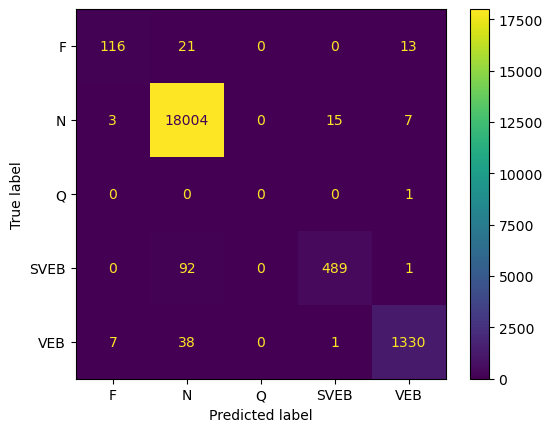

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rf_preds, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)
disp.plot()

In [72]:
y_test.value_counts()

N       4331
VEB     1387
SVEB     590
F        157
Name: type, dtype: int64

In [73]:
from sklearn.metrics import precision_recall_fscore_support


In [75]:
precision_recall_fscore_support(y_test, rf_preds, average='macro')

(0.9602767404058161, 0.902525837827582, 0.9286325676576763, None)

In [76]:
df.type.unique()

array(['N', 'SVEB', 'VEB', 'F'], dtype=object)

In [80]:
from sklearn.metrics import classification_report
target = ['N', 'SVEB', 'VEB', 'F']
print(classification_report(y_test, rf_preds,target_names=target))

              precision    recall  f1-score   support

           N       0.93      0.76      0.84       157
        SVEB       0.98      0.99      0.98      4331
         VEB       0.97      0.88      0.92       590
           F       0.96      0.98      0.97      1387

    accuracy                           0.97      6465
   macro avg       0.96      0.90      0.93      6465
weighted avg       0.97      0.97      0.97      6465



In [1]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(rf_model, X_test, y_test, name="RandomForestClassifier", plot_chance_level=True)
# _ = display.ax_.set_title("2-class Precision-Recall curve")

NameError: name 'rf_model' is not defined

In [1]:
import pandas as pd



In [18]:
df_cleaned = pd.read_csv('Arrithmia_cleanes.csv')

In [7]:
df_cleaned.shape

(100689, 26)

In [8]:
df = pd.read_csv('Datasets/Arrhythmia.csv')

In [9]:
df.shape

(100689, 34)

In [12]:
df_cleaned

,Unnamed: 0,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,...,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval
0,0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,...,0.996287,0.038310,0.025784,0.025930,0.025271,0.025930,2,18,22,2
1,1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,...,0.084069,0.014264,0.045458,0.032573,-0.104503,-0.042009,26,27,62,9
2,2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,...,0.091258,0.021311,0.008246,0.009528,0.008230,0.009528,3,8,12,1
3,3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,...,0.136602,-0.000665,-0.009725,-0.010203,-0.010203,-0.020536,6,9,16,1
4,4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,...,0.649990,0.024559,0.016925,0.016053,-0.099918,0.016053,16,5,31,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,...,0.949106,-0.050373,0.434459,-0.044400,-0.044400,-0.069234,5,6,20,9
100685,100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,...,0.943879,-0.058160,0.359751,-0.023172,-0.023172,-0.069530,7,5,20,8
100686,100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,...,1.022350,-0.073165,0.359805,-0.037813,-0.037813,-0.089396,9,7,24,8
100687,100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,...,0.458306,-0.065287,0.418958,-0.049864,-0.049864,-0.065487,3,1,12,8
